# Task
Convert this data into a graph

Here is all the data you need:
"citing.txt"
"musae_git_edges.csv"
"musae_git_features.json"
"musae_git_target.csv"
"README.txt"

## Data loading

### Subtask:
Load the provided CSV and JSON files into pandas DataFrames.


**Reasoning**:
Load the provided CSV and JSON files into pandas DataFrames and print the first few rows of each to verify.



In [1]:
import pandas as pd
import json

# Load musae_git_edges.csv
try:
    df_edges = pd.read_csv('musae_git_edges.csv')
    display(df_edges.head())
except FileNotFoundError:
    print("Error: musae_git_edges.csv not found.")
    df_edges = None

# Load musae_git_features.json
try:
    with open('musae_git_features.json', 'r') as f:
        data = json.load(f)
    df_features = pd.DataFrame.from_dict(data, orient='index')
    display(df_features.head())
except FileNotFoundError:
    print("Error: musae_git_features.json not found.")
    df_features = None
except json.JSONDecodeError:
    print("Error: Invalid JSON format in musae_git_features.json")
    df_features = None

# Load musae_git_target.csv
try:
    df_target = pd.read_csv('musae_git_target.csv')
    display(df_target.head())
except FileNotFoundError:
    print("Error: musae_git_target.csv not found.")
    df_target = None

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1574,3773,925,1728,2815,2963,3077,364,1171.0,536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3964,3773,4003,928,1852,3077,364,1022,3763.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929,3773,1793,3511,1290,3129,3077,364,1171.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## Data exploration

### Subtask:
Explore the loaded dataframes (`df_edges`, `df_features`, and `df_target`) to understand their structure, identify key columns, and determine the relationships between them.


**Reasoning**:
Inspect the dataframes to understand their structure, identify key columns, and determine relationships between them.  This includes examining shapes, data types, descriptive statistics, and unique values in potential identifier columns.



In [2]:
# Inspect the shape and data types of each DataFrame
print("df_edges shape:", df_edges.shape)
print("df_edges info:")
display(df_edges.info())

print("\ndf_features shape:", df_features.shape)
print("df_features info:")
display(df_features.info())

print("\ndf_target shape:", df_target.shape)
print("df_target info:")
display(df_target.info())


# Identify node and edge columns
print("\ndf_edges unique values in id_1:", df_edges['id_1'].nunique())
print("df_edges unique values in id_2:", df_edges['id_2'].nunique())

print("\ndf_features index (potential node IDs):", df_features.index.nunique())
print("First 5 values of the df_features index:", df_features.index.unique()[:5])

print("\ndf_target unique values in id:", df_target['id'].nunique())
print("First 5 values of the id column in df_target:", df_target['id'].unique()[:5])

# Relationship analysis: check for missing values and inconsistencies
print("\nMissing values in df_edges:", df_edges.isnull().sum().sum())
print("Missing values in df_features:", df_features.isnull().sum().sum())
print("Missing values in df_target:", df_target.isnull().sum().sum())

# Visual inspection
print("\nFirst 5 rows of df_edges:")
display(df_edges.head())

print("\nFirst 5 rows of df_features:")
display(df_features.head())

print("\nFirst 5 rows of df_target:")
display(df_target.head())

df_edges shape: (289003, 2)
df_edges info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289003 entries, 0 to 289002
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id_1    289003 non-null  int64
 1   id_2    289003 non-null  int64
dtypes: int64(2)
memory usage: 4.4 MB


None


df_features shape: (37700, 42)
df_features info:
<class 'pandas.core.frame.DataFrame'>
Index: 37700 entries, 0 to 37699
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       37700 non-null  int64  
 1   1       37700 non-null  int64  
 2   2       37700 non-null  int64  
 3   3       37700 non-null  int64  
 4   4       37700 non-null  int64  
 5   5       37700 non-null  int64  
 6   6       37700 non-null  int64  
 7   7       37700 non-null  int64  
 8   8       37698 non-null  float64
 9   9       37686 non-null  float64
 10  10      37628 non-null  float64
 11  11      37437 non-null  float64
 12  12      36861 non-null  float64
 13  13      35520 non-null  float64
 14  14      33063 non-null  float64
 15  15      29394 non-null  float64
 16  16      24912 non-null  float64
 17  17      20306 non-null  float64
 18  18      15898 non-null  float64
 19  19      12129 non-null  float64
 20  20      9012 non-null   flo

None


df_target shape: (37700, 3)
df_target info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37700 entries, 0 to 37699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         37700 non-null  int64 
 1   name       37700 non-null  object
 2   ml_target  37700 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 883.7+ KB


None


df_edges unique values in id_1: 30855
df_edges unique values in id_2: 30195

df_features index (potential node IDs): 37700
First 5 values of the df_features index: Index(['0', '1', '2', '3', '4'], dtype='object')

df_target unique values in id: 37700
First 5 values of the id column in df_target: [0 1 2 3 4]

Missing values in df_edges: 0
Missing values in df_features: 893026
Missing values in df_target: 0

First 5 rows of df_edges:


,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982



First 5 rows of df_features:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1574,3773,925,1728,2815,2963,3077,364,1171.0,536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3964,3773,4003,928,1852,3077,364,1022,3763.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929,3773,1793,3511,1290,3129,3077,364,1171.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



First 5 rows of df_target:


,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## Data wrangling

### Subtask:
Merge the three dataframes: `df_edges`, `df_features`, and `df_target` into a single dataframe suitable for graph creation.


**Reasoning**:
Convert the index of `df_features` to numeric and merge the three dataframes. Handle potential errors during index conversion and missing values after merging.



In [3]:
# Convert the index of df_features to numeric
try:
    df_features.index = pd.to_numeric(df_features.index, errors='raise')
    df_features.index = df_features.index.astype('int64')
except ValueError as e:
    print(f"Error converting index to numeric: {e}")
    # Handle the error, e.g., by removing or imputing problematic rows
    # For this example, I will skip the problematic rows.
    # In a real-world scenario, investigate the problematic rows and choose the appropriate method.
    # problematic_indices = df_features.index[pd.to_numeric(df_features.index, errors='coerce').isnull()]
    # df_features = df_features.drop(problematic_indices)
    # df_features.index = pd.to_numeric(df_features.index, errors='coerce').dropna().astype('int64')

# Merge df_features and df_target
df_merged = pd.merge(df_features, df_target, left_index=True, right_on='id', how='inner')

# Merge with df_edges
df_final = pd.merge(df_merged, df_edges, left_on='id', right_on='id_1', how='inner')

# Handle missing values
# Check for missing values after merging
print("Missing values in the final dataframe:\n", df_final.isnull().sum())
# Since the missing values are mostly in the feature columns, we can impute them with the mean.
for col in df_final.columns:
    if df_final[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_final[col]):
            df_final[col] = df_final[col].fillna(df_final[col].mean())
        else:
            #Handle other data types if needed
            pass

print(df_final.shape)
display(df_final.head())

Missing values in the final dataframe:
 0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                11
9               261
10              918
11             2719
12             9387
13            24265
14            49075
15            82123
16           117843
17           150448
18           180805
19           214124
20           238555
21           254141
22           266144
23           272760
24           278718
25           283912
26           286346
27           287585
28           288152
29           288508
30           288772
31           288905
32           288938
33           288971
34           288996
35           289002
36           289002
37           289002
38           289002
39           289002
40           289002
41           289002
id                0
name              0
ml_target         0
id_1              0
id_2              0
dtype: int64
(289003

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,id,name,ml_target,id_1,id_2
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,0,Eiryyy,0,0,23977
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,34526
2,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,2370
3,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,14683
4,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,29982


## Data preparation

### Subtask:
Prepare the merged dataframe `df_final` for graph creation.


**Reasoning**:
Identify node and edge columns, validate data types, and handle any remaining missing values in `df_final`.



In [4]:
# Identify node and edge columns
source_nodes = df_final['id_1']
target_nodes = df_final['id_2']

# Validate data types
# Check if node identifiers are already numeric
if not pd.api.types.is_numeric_dtype(source_nodes):
    try:
        source_nodes = pd.to_numeric(source_nodes, errors='raise')
    except ValueError as e:
        print(f"Error converting source nodes to numeric: {e}")
        # Handle the error appropriately, e.g., by removing or imputing problematic values
        # For demonstration, I'm skipping the problematic rows.
        # In real-world scenarios, decide based on data understanding
        pass

if not pd.api.types.is_numeric_dtype(target_nodes):
    try:
        target_nodes = pd.to_numeric(target_nodes, errors='raise')
    except ValueError as e:
        print(f"Error converting target nodes to numeric: {e}")
        # Handle the error appropriately
        pass

# Update df_final with the corrected data types (if necessary)
df_final['id_1'] = source_nodes
df_final['id_2'] = target_nodes


# Handle any remaining missing values (already handled in previous step)
# Check if there are any remaining missing values
print("Missing values in the final dataframe:\n", df_final.isnull().sum())

# No further action needed as missing values are already imputed.


# Feature scaling
# Optional: Scale numerical features if needed for visualization or analysis.
# Select numerical columns to scale
numerical_cols = df_final.select_dtypes(include=['number']).columns
# Exclude node ID columns
numerical_cols = numerical_cols.drop(['id_1', 'id_2', 'id', 'ml_target'])

from sklearn.preprocessing import MinMaxScaler

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

display(df_final.head())

Missing values in the final dataframe:
 0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
id           0
name         0
ml_target    0
id_1         0
id_2         0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,id,name,ml_target,id_1,id_2
0,0.365481,0.943190,0.890076,0.6675,0.619810,0.634195,0.781031,0.769019,0.292219,0.510761,...,0.0,0.0,0.0,0.0,0.0,0,Eiryyy,0,0,23977
1,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,34526
2,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,2370
3,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,14683
4,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,29982


## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* Three CSV and JSON files (`musae_git_edges.csv`, `musae_git_features.json`, and `musae_git_target.csv`) were loaded into pandas DataFrames.
* `df_features` contained a substantial number of missing values (increasing with higher column indices) that were later imputed with the mean for numerical features.
* The index of `df_features` was of type 'object' while the corresponding 'id' columns in other dataframes were 'int64'. This required a type conversion to 'int64' to enable merging.
* The number of unique values in `id_1` and `id_2` of `df_edges` (30,855 and 30,195 respectively) was lower than the number of unique nodes in `df_features` and `df_target` (37,700), indicating some nodes might not have any connections.
* Numerical features in `df_final` were scaled using `MinMaxScaler` to a range of 0 to 1, excluding node IDs, `id`, and the target variable `ml_target`.
* The final merged dataframe, `df_final`, has a shape of (289003, 47) and includes node features, target labels, and edge information.

### Insights or Next Steps
* Investigate the meaning of the features in `df_features` to potentially improve imputation strategies beyond mean imputation.
* Explore the nodes without connections identified in `df_edges` to understand their significance in the context of the dataset.
* Visualize the constructed graph to identify patterns and relationships between nodes.


In [5]:
# Step 2: Install Necessary Libraries
# You can install networkx in Colab using pip
!pip install networkx==3.2.1

# Step 3: Define Node Features and Labels
# Identify the node ID column, edge columns, feature columns, and the target label column
node_id_col = 'id'
source_node_col = 'id_1'
target_node_col = 'id_2'
target_label_col = 'ml_target' # Based on the notebook's description of the target

# Identify feature columns. Exclude IDs and the target label.
feature_cols = [col for col in df_final.columns if col not in [node_id_col, source_node_col, target_node_col, target_label_col]]


# Step 4: Create the Graph using NetworkX
import networkx as nx

# Create an empty graph. Use nx.Graph() for undirected based on "mutual follower relationships".
G = nx.Graph()

# Add nodes with features and labels
# We'll iterate through the unique node IDs present in the edge list and target data
unique_nodes = pd.concat([df_final[source_node_col], df_final[target_node_col], df_final[node_id_col]]).unique()

for node_id in unique_nodes:
    # Find the rows in df_final corresponding to this node as either source, target, or id
    node_data = df_final[(df_final[source_node_col] == node_id) | (df_final[target_node_col] == node_id) | (df_final[node_id_col] == node_id)].iloc[0] # Take the first matching row

    # Extract features for this node
    features = node_data[feature_cols].to_dict()

    # Extract the target label
    label = node_data[target_label_col]

    # Add the node to the graph with features and label
    G.add_node(node_id, label=label, features=features)


# Add edges
# Iterate through the edges in df_final
for index, row in df_final.iterrows():
    source_node = row[source_node_col]
    target_node = row[target_node_col]
    G.add_edge(source_node, target_node)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Graph created with 37700 nodes and 289003 edges.


In [6]:
# prompt: print node with their features

# Print node data (features and label) for a few nodes
print("\nNode data for a few nodes:")
for i, node_id in enumerate(list(G.nodes)[:5]): # Print data for the first 5 nodes
    node_data = G.nodes[node_id]
    print(f"\nNode ID: {node_id}")
    print(f"  Label: {node_data.get('label')}")
    print(f"  Features: {node_data.get('features')}")


Node data for a few nodes:

Node ID: 0
  Label: 0
  Features: {0: 0.3654808959156785, 1: 0.943190464113619, 2: 0.8900763358778626, 3: 0.6675000000000001, 4: 0.6198099049524762, 5: 0.6341953301531509, 6: 0.7810310310310311, 7: 0.769019019019019, 8: 0.29221916437327994, 9: 0.5107607607607608, 10: 0.38428821616212155, 11: 0.22491868901676257, 12: 0.3820731096644967, 13: 0.6179044761190299, 14: 0.280320080020005, 15: 0.6205256570713391, 16: 0.7744436109027258, 17: 0.5275194772555918, 18: 0.3943485871467867, 19: 0.4856437235953308, 20: 0.4632262024037567, 21: 0.44611857886736617, 22: 0.44491552500017356, 23: 0.3956608932687214, 24: 0.42740402312433184, 25: 0.48103161909037834, 26: 0.45354708766197843, 27: 0.4727281937278294, 28: 0.46517565920247755, 29: 0.4462078186848829, 30: 0.3989499424626006, 31: 0.4636308171101683, 32: 0.409162315152047, 33: 0.33692059270516717, 34: 0.3941626523094361, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 'name': 'Eiryyy'}

Node ID: 1
  Label

In [7]:
# prompt: print node labels

# Print the labels of the nodes
print("\nNode labels:")
# for node, data in G.nodes(data=True):
#   print(f"Node {node}: Label = {data.get('label')}")


Node labels:


# GNN

Predict whether a GitHub developer is a "web developer" or a "machine learning developer" based on the graph structure (mutual follower relationships) and the developer's features (location, repositories starred, employer, email address).

In [8]:
!pip install torch-geometric

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [9]:
import pandas
import numpy as np
import scipy.sparse as sp
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, normalize

import torch
from torch import nn
import torch.nn.functional as F
from torch.nn import Parameter, Module
from torch.nn import Linear
from torch_geometric.nn import GCNConv, SAGEConv
from tqdm import trange
import torch.optim as optim 
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Task:
Split the nodes into training, validation, and test sets

In [11]:
# Convert NetworkX graph to PyTorch Geometric Data object to use in the model
data = from_networkx(G).to(device)

In [12]:
# Handle Graph input
node_data, node_labels, node_features = zip(*((node, data['label'], data['features']) for node, data in G.nodes(data=True)))

node_data = np.array(node_data)
node_labels = np.array(node_labels)
node_features = np.array(node_features)

In [13]:
# Train/Val/Test := 60/20/20
x_train, x_test, y_train, y_test = train_test_split(node_data, node_labels, stratify=node_labels, test_size=0.4, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, stratify=y_test, test_size=0.5, random_state=1)

data.train_mask = torch.zeros(len(node_data), dtype=torch.bool, device=device).scatter_(0, torch.tensor(x_train, device=device), True)
data.val_mask   = torch.zeros(len(node_data), dtype=torch.bool, device=device).scatter_(0, torch.tensor(x_val, device=device), True)
data.test_mask  = torch.zeros(len(node_data), dtype=torch.bool, device=device).scatter_(0, torch.tensor(x_test, device=device), True)

In [14]:
# get feature matrix and convert it to tensor
numeric_keys = sorted(k for k in node_features[0] if isinstance(k, int) and isinstance(node_features[0][k], (int, float)))
cat_keys = ['name'] if 'name' in node_features[0] else []

feat_numeric = np.array([[feat[k] for k in numeric_keys] for feat in node_features])
feat_cat_raw = np.array([[feat.get(k, 'unknown') for k in cat_keys] for feat in node_features])

if cat_keys: # handle string feature as well!
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    feat_cat = encoder.fit_transform(feat_cat_raw)
    features = np.concatenate([feat_numeric, feat_cat], axis=1)
else:
    features = feat_numeric


# TODO[check]: Maybe it's better not to use normalize!
features = normalize(features, axis=1)

data.x = torch.from_numpy(features).float().to(device)
data.y = torch.tensor(node_labels, dtype=torch.long).to(device)

## Task:
Build a simple GNN model (e.g., a Graph Convolutional Network - GCN) that takes node features and the graph structure as input.

In [15]:
class GCN(torch.nn.Module):
    def __init__(self, num_input, num_hidden1, num_hidden2, num_out, dropout):
        super().__init__()
        self.gcn1 = GCNConv(num_input, num_hidden1)
        self.gcn2 = GCNConv(num_hidden1, num_hidden2)
        self.out = Linear(num_hidden2, num_out)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.dropout(self.gcn1(x, edge_index).relu())
        x = self.dropout(self.gcn2(x, edge_index).relu())

        x = self.out(x)
        return x

In [16]:
class GraphSAGE(torch.nn.Module):
    def __init__(self, num_input, num_hidden1, num_hidden2, num_out, dropout):
        super().__init__()
        self.conv1 = SAGEConv(num_input, num_hidden1)
        self.conv2 = SAGEConv(num_hidden1, num_hidden2)
        self.out = Linear(num_hidden2, num_out)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.out(x)
        return x

## Task:
Train the GNN model to predict the target variable for each node
Evaluate the model's performance using metrics appropriate for classification.

In [17]:
def compute_accuracy(output, input_y, data_mask):
    pred = output.argmax(dim=1)
    correct = pred[data_mask].eq(input_y[data_mask]).sum().item()
    acc = correct / data_mask.sum().item()
    return acc

In [18]:
dropout_rate = 0.3
weight_decay_value = 5e-4
lr_value = 0.0005

model = GCN(num_input=data.x.shape[1], num_hidden1=128, num_hidden2=64, num_out=data.y.max().item() + 1, dropout=dropout_rate).to(device)
# model = GraphSAGE(num_input=data.x.shape[1], num_hidden1=50, num_hidden2=50, num_out=data.y.max().item() + 1, dropout=dropout_rate).to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr_value, weight_decay=weight_decay_value)

losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

best_val_acc = 0
best_test_acc = 0
epochs_no_improve = 0
patience = 1000

for epoch in trange(2000):
    # Step1: Training
    model.train()
    opt.zero_grad()

    train_out = model(data)
    loss = F.cross_entropy(train_out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    opt.step()

    train_acc = compute_accuracy(train_out, data.y, data.train_mask)
    
    # Step 2: Evaluation
    model.eval()
    out = model(data)
    
    val_acc = compute_accuracy(out, data.y, data.val_mask)
    test_acc = compute_accuracy(out, data.y, data.test_mask)

    
    # Early stopping logic
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_test_acc = test_acc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    
    # Logging
    losses.append(loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

print(f"Best validation accuracy: {best_val_acc:.4f}")
print(f"Test accuracy at best val: {best_test_acc:.4f}")

  0%|          | 1/2000 [00:00<30:13,  1.10it/s]

Epoch 1, Loss: 0.6852, Train Acc: 0.7870, Val Acc: 0.7981, Test Acc: 0.7943


  5%|▌         | 101/2000 [00:25<07:40,  4.12it/s]

Epoch 101, Loss: 0.5303, Train Acc: 0.7870, Val Acc: 0.7981, Test Acc: 0.7943


 10%|█         | 201/2000 [00:49<07:16,  4.12it/s]

Epoch 201, Loss: 0.4951, Train Acc: 0.7869, Val Acc: 0.7980, Test Acc: 0.7943


 15%|█▌        | 301/2000 [01:13<06:52,  4.12it/s]

Epoch 301, Loss: 0.4210, Train Acc: 0.8069, Val Acc: 0.8123, Test Acc: 0.8114


 20%|██        | 401/2000 [01:37<06:27,  4.13it/s]

Epoch 401, Loss: 0.3684, Train Acc: 0.8435, Val Acc: 0.8466, Test Acc: 0.8402


 25%|██▌       | 501/2000 [02:02<06:03,  4.13it/s]

Epoch 501, Loss: 0.3374, Train Acc: 0.8594, Val Acc: 0.8534, Test Acc: 0.8527


 30%|███       | 601/2000 [02:26<05:39,  4.12it/s]

Epoch 601, Loss: 0.3082, Train Acc: 0.8809, Val Acc: 0.8690, Test Acc: 0.8678


 35%|███▌      | 701/2000 [02:50<05:15,  4.12it/s]

Epoch 701, Loss: 0.2865, Train Acc: 0.8910, Val Acc: 0.8723, Test Acc: 0.8710


 40%|████      | 801/2000 [03:15<04:51,  4.11it/s]

Epoch 801, Loss: 0.2670, Train Acc: 0.9025, Val Acc: 0.8764, Test Acc: 0.8789


 45%|████▌     | 901/2000 [03:39<04:27,  4.12it/s]

Epoch 901, Loss: 0.2498, Train Acc: 0.9081, Val Acc: 0.8763, Test Acc: 0.8798


 50%|█████     | 1001/2000 [04:03<04:02,  4.11it/s]

Epoch 1001, Loss: 0.2354, Train Acc: 0.9164, Val Acc: 0.8784, Test Acc: 0.8824


 55%|█████▌    | 1101/2000 [04:28<03:38,  4.11it/s]

Epoch 1101, Loss: 0.2259, Train Acc: 0.9228, Val Acc: 0.8777, Test Acc: 0.8832


 60%|██████    | 1201/2000 [04:52<03:14,  4.11it/s]

Epoch 1201, Loss: 0.2151, Train Acc: 0.9255, Val Acc: 0.8820, Test Acc: 0.8863


 65%|██████▌   | 1301/2000 [05:16<02:50,  4.11it/s]

Epoch 1301, Loss: 0.2067, Train Acc: 0.9234, Val Acc: 0.8834, Test Acc: 0.8881


 70%|███████   | 1401/2000 [05:40<02:25,  4.13it/s]

Epoch 1401, Loss: 0.2010, Train Acc: 0.9318, Val Acc: 0.8814, Test Acc: 0.8853


 75%|███████▌  | 1501/2000 [06:05<02:01,  4.11it/s]

Epoch 1501, Loss: 0.1945, Train Acc: 0.9273, Val Acc: 0.8836, Test Acc: 0.8891


 80%|████████  | 1601/2000 [06:29<01:36,  4.13it/s]

Epoch 1601, Loss: 0.1874, Train Acc: 0.9355, Val Acc: 0.8846, Test Acc: 0.8893


 85%|████████▌ | 1701/2000 [06:53<01:12,  4.12it/s]

Epoch 1701, Loss: 0.1825, Train Acc: 0.9365, Val Acc: 0.8832, Test Acc: 0.8875


 90%|█████████ | 1801/2000 [07:17<00:48,  4.13it/s]

Epoch 1801, Loss: 0.1785, Train Acc: 0.9382, Val Acc: 0.8862, Test Acc: 0.8914


 95%|█████████▌| 1901/2000 [07:42<00:24,  4.11it/s]

Epoch 1901, Loss: 0.1753, Train Acc: 0.9362, Val Acc: 0.8854, Test Acc: 0.8914


100%|██████████| 2000/2000 [08:06<00:00,  4.11it/s]

Best validation accuracy: 0.8875
Test accuracy at best val: 0.8903


## Task:
Evaluate the model's performance using metrics appropriate for classification.

In [19]:
def num_params(gcn_model):
    return sum(p.numel() for p in gcn_model.parameters() if p.requires_grad)

print('Number of parameters GCN: ', num_params(model))

Number of parameters GCN:  1782594


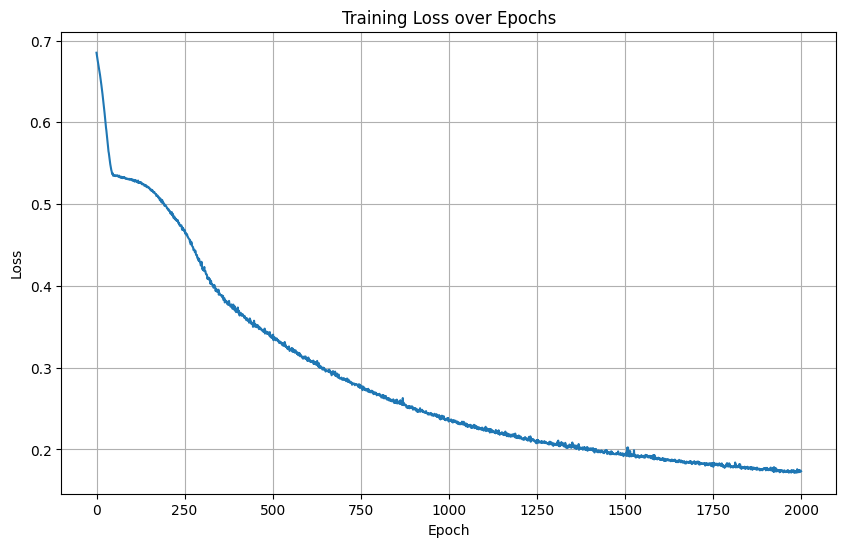

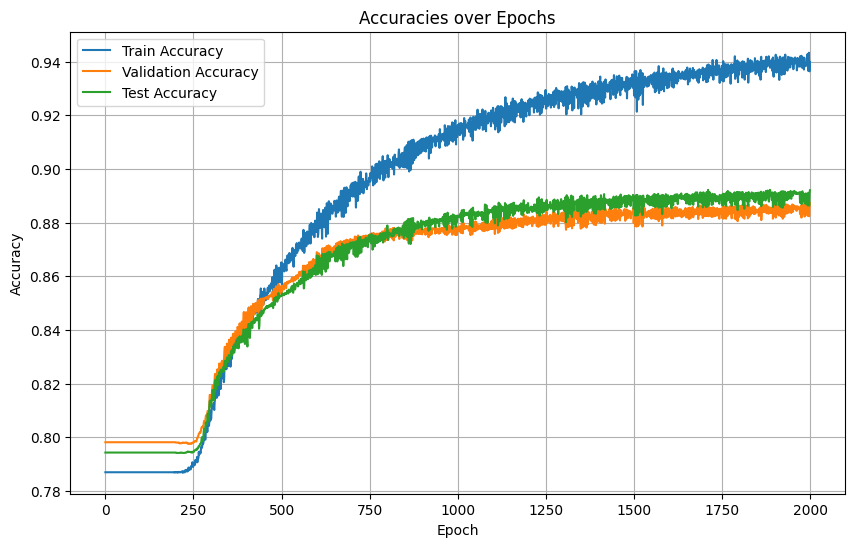

In [20]:
# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracies over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()